## Lending Club Data Default Analyese

### Problem Statement:
Identifying Risk Factors for Loan Default in a Consumer Finance Company

### Importing requried libraries and load the dataset

In [188]:
# Import required libraries
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# loading the dataset
loan_df = pd.read_csv('loan.csv',low_memory=False)
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
# print the first five rows of dataset
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [191]:
# print the last five rows of dataset
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# lets look at the shape of dataset
loan_df.shape

(39717, 111)

  - There are 39717 rows and 111 columns in the dataset

In [193]:
# Information of the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [194]:
# Describe the dataset
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [195]:
# find the data types of each columns
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [196]:
# Find the null /missing values in a each columns 
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [197]:
!pip install jupyter-summarytools

In [200]:
#importing libraries from summarytools
from summarytools import dfSummary


In [201]:
# visualise summarry of dataset
dfSummary(loan_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 683131.9 (210694.1)min < med < max:54734.0 < 665665.0 < 1077501.0IQR (CV) : 321534.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtUlEQVR4nO3du27iQBSA4TNLAHORLYQEHS+wEgWlH2Ifdh8hBU9AS0VngZAR3ngB462jJSG+refM/l8dhyl+mcEnGUye5wLY7lvbCwC+4qXtBdjKGDMQkV7Jyy95nr/VuZ7/HaE+YIwZTKfTH77vT8pcfzqdjsaYn8RaH0J9rOf7/iQMw7cgCNIiF8Zx7K3X68nhcOiJCKHWhFA/EQRBOpvNfhW9LssyX0R8Y0yZl2Xb8ACh1ixJku71el0uFotOp9MpdDcWYdvwEUKt2eVyefE8b7hardL5fH4sci3bho8RakNGo1GpbYOIDGpfjAN4jgoVCBUq8NbvGFcHFYTqEJcHFYTqFmcHFYTqoLKDCrH4iQOhWibLsq6Un2r59/u9W/OSvqzJ/TGhWqTqVOt6vXpZln1P0/RVRMrcUUtren9MqBapMtUSEdntdpPNZjO83W6dJtb3RKP7Y0K1UNmp1vF4bH2P2dT+mAf+UIFQoQKhQgVChQqEChUIFSo4+3iq4pSk1QkP/uZkqFWnJG1OePCYk6FKhSmJSOsTHjzgaqgiUn5KYsOEB+/xYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFDB6X/uQzE2n3ZNqBAR+0+7JlSIiP2nXRMq3rH1tGs+TEEFQoUKhAoVCBUqECpUIFSoQKhQwernqBWON+doc8dYG2qV48052tw91oYqFY4352hz99gcqoiUO96co83dw4cpqNDoHZXvekJdGguV73pCnZ6GWuUR0Xg8noVheOK7nlDVp6HW8Yio3++/2vj3jdDl2R215/v+ZLlcymAw+F3kF+/3e2+73Q7jOB5FUXQpurDz+eyJiCRJ4kVRNPxX17b52lrXXfX6OI69Zz/zB6YSkxByCH5PAAAAAElFTkSuQmCC"">",0(0.0%)
2,member_id[int64],Mean (sd) : 850463.6 (265678.3)min < med < max:70699.0 < 850812.0 < 1314167.0IQR (CV) : 380559.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACfElEQVR4nO3cwYraQBjA8W+aVaJCggh68wUKPXj0IfqwfYQefALfwJsgEjHdYIzpobRsYat1kmHmm/3/zjuYw5+YiTufadtWgNB98n0BwP948X0BMTLGjERkaLn80rbta5/XEwNC7ZkxZjSbzb5mWTa1WX86nY7GmG/E+jdC7d8wy7Lper1+zfO8emZhURTpZrOZHg6HoYhYhRrr3ZxQHcnzvJrP5z8slo5sPzPmuzmhxsXr3dwlQo2Qj7u5a4QamKZpBiKSGWNslme3223Q8yUFgVADUpbloK7rL8vlMkmS5KmvbhGRuq7Tpmk+V1X1XURs7qiduNzIEWpALpfLS5qm49VqVS0Wi+Oz63e73XS73Y6v12vi4vrucb2RI9QATSYTq2fM4/Ho8xnT6UaOUNErVxs5fuuHCoQKFfjq/4cOO9hoXxH5RKjv6LKD9f2KKFaE+j7rHazPV0QxI9Q7bHawnl8RRYvNFFQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVOoeKPkGezEipEJPzZrIQKEQl/Nmu0oXacfvxh50eFOps1ylC7Tj9mflR4ogxVOsyOEmF+VIhiDVVE7KcfMz8qPEGHyoxS/BZsqMwoxVvBhirMKMUbIYcqIswoxS/81g8VCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVHD6Wz/HQdAXZ6FyHAR9cnlH5TgIeuP83/w4DoI+PAyV4yAIwd1QOQ6CUDy6o3IcBEFw/oxalmW63+/Hz647n8+p7foua31+ttbr7rq+KIr00d/8BJowlD1QmcCBAAAAAElFTkSuQmCC"">",0(0.0%)
3,loan_amnt[int64],Mean (sd) : 11219.4 (7456.7)min < med < max:500.0 < 10000.0 < 35000.0IQR (CV) : 9500.0 (1.5),885 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3cTY7aMBiA4c9lgPCjRAgJdlygUhcsc4getkeYBSfgBuyQEAoinYjw003b1WgG7Lh8X/o++4RI84rBjm13u90E0O7Lsx8AuMdLzJs75wYi0gu4xel2u7019TywK1qozrnBdDr9nqbpxPceh8Nh75z7QayI+Y3aS9N0kuf5W5Zl1aMXF0WRrFaryW6364kIof7nov7rFxHJsqyazWY/PS8fNPowMIvBFEwgVJhAqDCBUGECocIEQoUJhAoTCBUmRJ/wD3G5XLoikjrnfC5nnUCLqA21LMtuXdffFotFp9PpPPwKlnUC7aI21NPp9JIkyXC5XFbz+Xz/yLWsE2gftaH+MRqNfNcKsE6gRRhMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhgvqF074C91uJsOdKlU9DDTiMN71er12P64KF7rcSYc+VNh+GGnIYb13XyeVy+VpV1auI+B476SVkv5UIe640+uwb1fsw3s1mM1mv18Pz+dwJeL4gAfutRNhzpcpdv1F9DuPd7/f8odEYRv0wgVBhQmunp0JxnJAuhPoOjhPSh1DfwXFC+hDqBzhOSA8GUzCBUGECocIEfqNGwNRW8wi1YUxtxUGoDWNqKw5CjYSprWYxmIIJhAoTCBUmECpMIFSYwKi/ZQJ2DYsoftlAqC0SsmtYRPfLBkJtF+9dw9pfNhBqC/nsGv5N7csGQlUmcEHL006niY1QFQld0PLM02liI1RFQo8i0nA6TSyEqpDvgpZnn04Tc2qMUNGI2FNjhIq/Qgdy4/F4luf5IcbUGKFCRJobyPX7/dcYU2OEChHRP5C7K9SiKJJHb3w8HhMRkbIsk+12O/yX11v9bA3PHcrns+/p6xdDfLD4QerBXQAAAABJRU5ErkJggg=="">",0(0.0%)
4,funded_amnt[int64],Mean (sd) : 10947.7 (7187.2)min < med < max:500.0 < 9600.0 < 35000.0IQR (CV) : 9

In [202]:
# Drop the unwanted columns from the dataset
unwanted_columns=['sub_grade','emp_title','pymnt_plan','url','desc','title','zip_code','addr_state','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']
loan_df.drop(unwanted_columns, axis=1, inplace=True)

In [203]:
# Check shape of the dataset again
loan_df.shape

(39717, 17)

In [204]:
# Check summary again
dfSummary(loan_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 683131.9 (210694.1)min < med < max:54734.0 < 665665.0 < 1077501.0IQR (CV) : 321534.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtUlEQVR4nO3du27iQBSA4TNLAHORLYQEHS+wEgWlH2Ifdh8hBU9AS0VngZAR3ngB462jJSG+refM/l8dhyl+mcEnGUye5wLY7lvbCwC+4qXtBdjKGDMQkV7Jyy95nr/VuZ7/HaE+YIwZTKfTH77vT8pcfzqdjsaYn8RaH0J9rOf7/iQMw7cgCNIiF8Zx7K3X68nhcOiJCKHWhFA/EQRBOpvNfhW9LssyX0R8Y0yZl2Xb8ACh1ixJku71el0uFotOp9MpdDcWYdvwEUKt2eVyefE8b7hardL5fH4sci3bho8RakNGo1GpbYOIDGpfjAN4jgoVCBUq8NbvGFcHFYTqEJcHFYTqFmcHFYTqoLKDCrH4iQOhWibLsq6Un2r59/u9W/OSvqzJ/TGhWqTqVOt6vXpZln1P0/RVRMrcUUtren9MqBapMtUSEdntdpPNZjO83W6dJtb3RKP7Y0K1UNmp1vF4bH2P2dT+mAf+UIFQoQKhQgVChQqEChUIFSo4+3iq4pSk1QkP/uZkqFWnJG1OePCYk6FKhSmJSOsTHjzgaqgiUn5KYsOEB+/xYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFDB6X/uQzE2n3ZNqBAR+0+7JlSIiP2nXRMq3rH1tGs+TEEFQoUKhAoVCBUqECpUIFSoQKhQwernqBWON+doc8dYG2qV48052tw91oYqFY4352hz99gcqoiUO96co83dw4cpqNDoHZXvekJdGguV73pCnZ6GWuUR0Xg8noVheOK7nlDVp6HW8Yio3++/2vj3jdDl2R215/v+ZLlcymAw+F3kF+/3e2+73Q7jOB5FUXQpurDz+eyJiCRJ4kVRNPxX17b52lrXXfX6OI69Zz/zB6YSkxByCH5PAAAAAElFTkSuQmCC"">",0(0.0%)
2,member_id[int64],Mean (sd) : 850463.6 (265678.3)min < med < max:70699.0 < 850812.0 < 1314167.0IQR (CV) : 380559.0 (3.2),"39,717 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACfElEQVR4nO3cwYraQBjA8W+aVaJCggh68wUKPXj0IfqwfYQefALfwJsgEjHdYIzpobRsYat1kmHmm/3/zjuYw5+YiTufadtWgNB98n0BwP948X0BMTLGjERkaLn80rbta5/XEwNC7ZkxZjSbzb5mWTa1WX86nY7GmG/E+jdC7d8wy7Lper1+zfO8emZhURTpZrOZHg6HoYhYhRrr3ZxQHcnzvJrP5z8slo5sPzPmuzmhxsXr3dwlQo2Qj7u5a4QamKZpBiKSGWNslme3223Q8yUFgVADUpbloK7rL8vlMkmS5KmvbhGRuq7Tpmk+V1X1XURs7qiduNzIEWpALpfLS5qm49VqVS0Wi+Oz63e73XS73Y6v12vi4vrucb2RI9QATSYTq2fM4/Ho8xnT6UaOUNErVxs5fuuHCoQKFfjq/4cOO9hoXxH5RKjv6LKD9f2KKFaE+j7rHazPV0QxI9Q7bHawnl8RRYvNFFQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVOoeKPkGezEipEJPzZrIQKEQl/Nmu0oXacfvxh50eFOps1ylC7Tj9mflR4ogxVOsyOEmF+VIhiDVVE7KcfMz8qPEGHyoxS/BZsqMwoxVvBhirMKMUbIYcqIswoxS/81g8VCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVHD6Wz/HQdAXZ6FyHAR9cnlH5TgIeuP83/w4DoI+PAyV4yAIwd1QOQ6CUDy6o3IcBEFw/oxalmW63+/Hz647n8+p7foua31+ttbr7rq+KIr00d/8BJowlD1QmcCBAAAAAElFTkSuQmCC"">",0(0.0%)
3,loan_amnt[int64],Mean (sd) : 11219.4 (7456.7)min < med < max:500.0 < 10000.0 < 35000.0IQR (CV) : 9500.0 (1.5),885 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3cTY7aMBiA4c9lgPCjRAgJdlygUhcsc4getkeYBSfgBuyQEAoinYjw003b1WgG7Lh8X/o++4RI84rBjm13u90E0O7Lsx8AuMdLzJs75wYi0gu4xel2u7019TywK1qozrnBdDr9nqbpxPceh8Nh75z7QayI+Y3aS9N0kuf5W5Zl1aMXF0WRrFaryW6364kIof7nov7rFxHJsqyazWY/PS8fNPowMIvBFEwgVJhAqDCBUGECocIEQoUJhAoTCBUmRJ/wD3G5XLoikjrnfC5nnUCLqA21LMtuXdffFotFp9PpPPwKlnUC7aI21NPp9JIkyXC5XFbz+Xz/yLWsE2gftaH+MRqNfNcKsE6gRRhMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhgvqF074C91uJsOdKlU9DDTiMN71er12P64KF7rcSYc+VNh+GGnIYb13XyeVy+VpV1auI+B476SVkv5UIe640+uwb1fsw3s1mM1mv18Pz+dwJeL4gAfutRNhzpcpdv1F9DuPd7/f8odEYRv0wgVBhQmunp0JxnJAuhPoOjhPSh1DfwXFC+hDqBzhOSA8GUzCBUGECocIEfqNGwNRW8wi1YUxtxUGoDWNqKw5CjYSprWYxmIIJhAoTCBUmECpMIFSYwKi/ZQJ2DYsoftlAqC0SsmtYRPfLBkJtF+9dw9pfNhBqC/nsGv5N7csGQlUmcEHL006niY1QFQld0PLM02liI1RFQo8i0nA6TSyEqpDvgpZnn04Tc2qMUNGI2FNjhIq/Qgdy4/F4luf5IcbUGKFCRJobyPX7/dcYU2OEChHRP5C7K9SiKJJHb3w8HhMRkbIsk+12O/yX11v9bA3PHcrns+/p6xdDfLD4QerBXQAAAABJRU5ErkJggg=="">",0(0.0%)
4,funded_amnt[int64],Mean (sd) : 10947.7 (7187.2)min < med < max:500.0 < 9600.0 < 35000.0IQR (CV) : 9

In [205]:
# Checking the null values 
loan_df.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
dtype: int64

In [206]:
loan_df.columns[loan_df.isna().any()]

Index(['emp_length'], dtype='object')

In [207]:
print(loan_df['emp_length'].mode())

0    10+ years
Name: emp_length, dtype: object


In [208]:
loan_df.dropna(axis=0, subset=['emp_length'], inplace=True)
print(loan_df.columns[loan_df.isna().any()])

Index([], dtype='object')


In [209]:
loan_df.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
dtype: int64


### Detection of outliers


In [210]:
 #1. loan_amount
loan_df.loan_amnt.describe()

count    38642.000000
mean     11291.615988
std       7462.136215
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

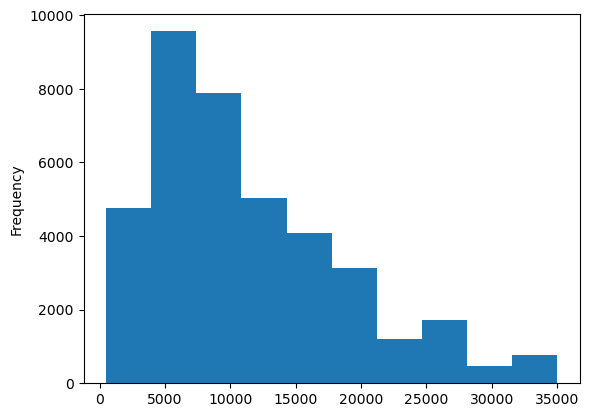

In [211]:
#plot histogram 
loan_df.loan_amnt.plot.hist()
plt.show()

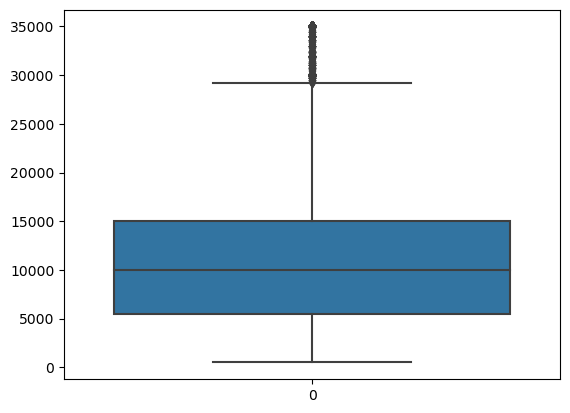

In [212]:
# Plot boxplot for find ouliers
sns.boxplot(loan_df.loan_amnt)
plt.show()

In [213]:
#2.Funded_amount
loan_df.funded_amnt.describe()


count    38642.000000
mean     11017.101211
std       7193.038828
min        500.000000
25%       5500.000000
50%       9950.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

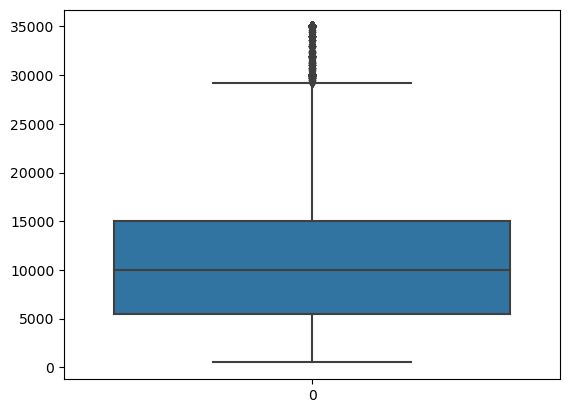

In [214]:
# plot boxplot to find outliers
sns.boxplot(loan_df.funded_amnt)
plt.show()

In [215]:
#3 funded_amnt_inv
loan_df.funded_amnt_inv.describe()

count    38642.000000
mean     10455.452667
std       7139.613641
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14425.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

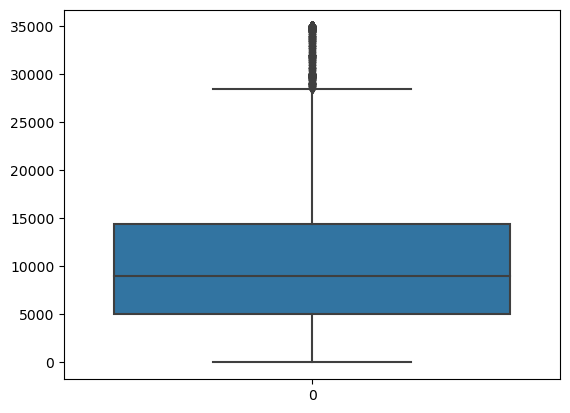

In [216]:
# plot boxplot to find outliers
sns.boxplot(loan_df.funded_amnt_inv)
plt.show()

In [217]:
# 4. installment
loan_df.installment.describe()

count    38642.000000
mean       326.760477
std        209.143908
min         15.690000
25%        168.442500
50%        282.830000
75%        434.397500
max       1305.190000
Name: installment, dtype: float64

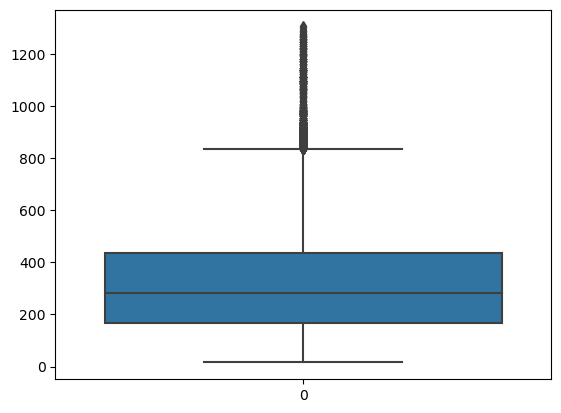

In [218]:
# plot boxplot to find outliers
sns.boxplot(loan_df.installment)
plt.show()

In [219]:
#5. annual_inc
loan_df.annual_inc.describe()


count    3.864200e+04
mean     6.960828e+04
std      6.425320e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.319999e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

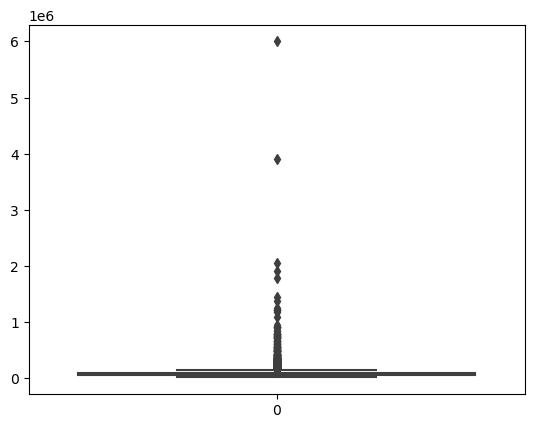

In [220]:
# plot boxplot to find outliers
sns.boxplot(loan_df.annual_inc)
plt.show()

##### annual_inc has the ouliers but it is useful for our analysis

##### 6) dti 

In [221]:
#6. dti
loan_df.dti.describe()


count    38642.000000
mean        13.325108
std          6.666902
min          0.000000
25%          8.200000
50%         13.415000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

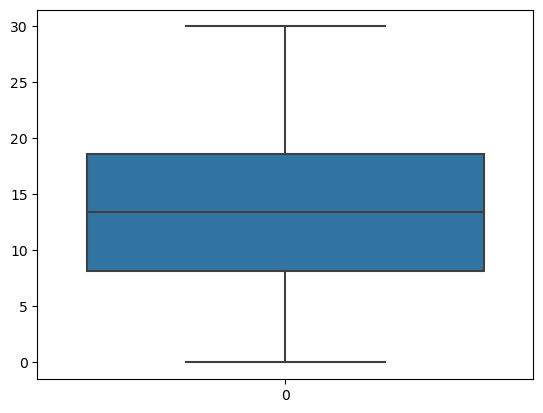

In [222]:
#plot boxlot to find outliers
sns.boxplot(loan_df.dti)
plt.show()

## Univariate analysis

###### 1) Distribution of loan status

In [223]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [224]:
loan_df = loan_df[loan_df.loan_status!='Current']
print(loan_df.shape)

(37544, 17)


In [225]:
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64

In [226]:
loan_df.loan_status.value_counts(normalize=True)

loan_status
Fully Paid     0.856195
Charged Off    0.143805
Name: proportion, dtype: float64

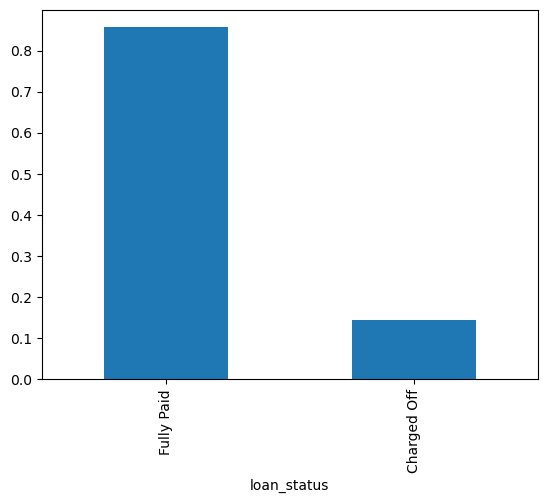

In [227]:
#plot bar graph
loan_df.loan_status.value_counts(normalize=True).plot.bar()
plt.show()

##### *INFERENCE* : Charged off less in number than the fully paid borrwers.

##### 2) Distribution of loan_amount

In [228]:
loan_df.loan_amnt.describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

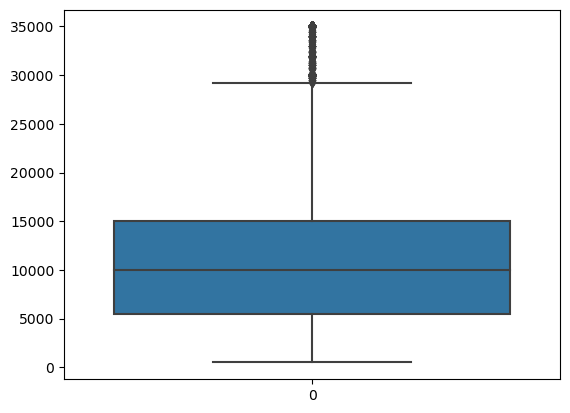

In [229]:
# plot bargraph for loan_amnt
sns.boxplot(loan_df.loan_amnt)
plt.show()

##### *INFERENCE* : Max amount of loan is from 5000 - 15000

In [230]:
loan_df.loan_amnt.value_counts()


loan_amnt
10000    2742
12000    2213
5000     1959
6000     1834
15000    1805
         ... 
34525       1
13275       1
11275       1
23275       1
22550       1
Name: count, Length: 866, dtype: int64

##### *INFERENCE* : most borrwers took the loan of 10000 rupees

##### here is the percentage of them

In [231]:
loan_df.loan_amnt.value_counts(normalize=True)

loan_amnt
10000    0.073034
12000    0.058944
5000     0.052179
6000     0.048849
15000    0.048077
           ...   
34525    0.000027
13275    0.000027
11275    0.000027
23275    0.000027
22550    0.000027
Name: proportion, Length: 866, dtype: float64

##### 3) Distribution of interest rate 

In [232]:
loan_df.int_rate.describe()

count      37544
unique       370
top       10.99%
freq         891
Name: int_rate, dtype: object

In [233]:
loan_df.int_rate.value_counts()

int_rate
10.99%    891
11.49%    766
7.51%     756
13.49%    736
7.88%     701
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

##### *INFERENCE* : mostly the loan taken by interest rate is 10.99% (mode)

##### 4) Distribution of annual income

In [234]:
loan_df.annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [235]:
loan_df.annual_inc.value_counts()

annual_inc
60000.0     1434
50000.0     1009
40000.0      838
45000.0      794
75000.0      779
            ... 
85634.0        1
126996.0       1
57110.0        1
74758.0        1
27376.0        1
Name: count, Length: 5006, dtype: int64

In [236]:
loan_df.annual_inc.value_counts(normalize=True)

annual_inc
60000.0     0.038195
50000.0     0.026875
40000.0     0.022320
45000.0     0.021149
75000.0     0.020749
              ...   
85634.0     0.000027
126996.0    0.000027
57110.0     0.000027
74758.0     0.000027
27376.0     0.000027
Name: proportion, Length: 5006, dtype: float64

##### *INTERFERENCE* : 38% of the people out of 100% is of the payment 60000 and this is the highest percentage.

#####  5) Distribution of loan duration/term

In [237]:
loan_df.term.describe()

count          37544
unique             2
top        36 months
freq           28287
Name: term, dtype: object

In [238]:
loan_df.term.value_counts()

term
 36 months    28287
 60 months     9257
Name: count, dtype: int64

In [239]:
loan_df.term.value_counts(normalize=True)

term
 36 months    0.753436
 60 months    0.246564
Name: proportion, dtype: float64

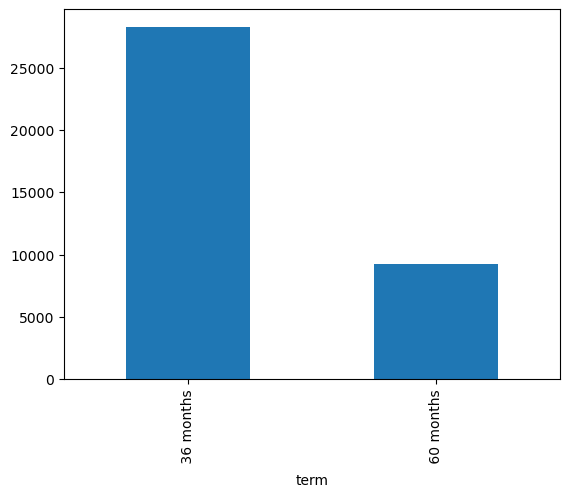

In [240]:
# plot bargraph for term
loan_df.term.value_counts().plot.bar()
plt.show()


##### *INFERENCE* : Almost 75%(28287) of the borrowers take loan of 36 month

###### 6) Distribution of loan types/ purposes

In [241]:
loan_df.purpose.describe()

count                  37544
unique                    14
top       debt_consolidation
freq                   17675
Name: purpose, dtype: object

In [242]:
loan_df.purpose.value_counts()

purpose
debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

In [243]:
loan_df.purpose.value_counts(normalize=True)

purpose
debt_consolidation    0.470781
credit_card           0.130487
other                 0.098897
home_improvement      0.074180
major_purchase        0.055402
small_business        0.045547
car                   0.038568
wedding               0.024318
medical               0.017473
moving                0.014703
house                 0.009429
vacation              0.009269
educational           0.008443
renewable_energy      0.002504
Name: proportion, dtype: float64

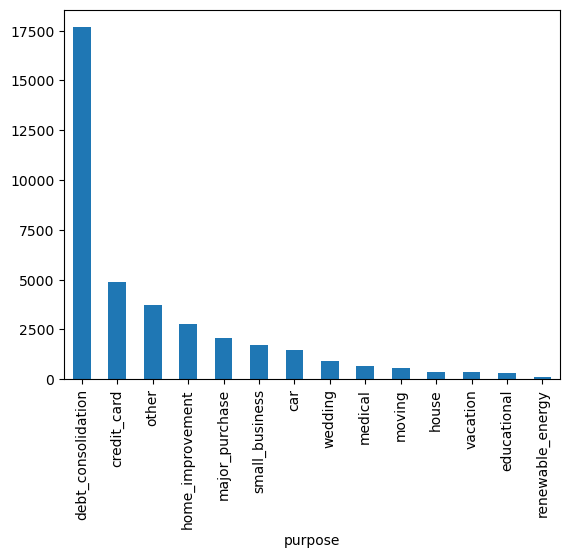

In [244]:
loan_df.purpose.value_counts().plot.bar()
plt.show()

##### *INFERANCE* : There are so many reasons for take a loan from that highest purposes of taking loan is debt_consolidation and i.e 47%

##### 7) Loan application spread across the grades

In [245]:
loan_df.grade.describe()

count     37544
unique        7
top           B
freq      11359
Name: grade, dtype: object

In [246]:
loan_df.grade.value_counts()

grade
B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: count, dtype: int64

In [247]:
loan_df.grade.value_counts(normalize=True)

grade
B    0.302552
A    0.257298
C    0.204267
D    0.132618
E    0.069785
F    0.025543
G    0.007937
Name: proportion, dtype: float64

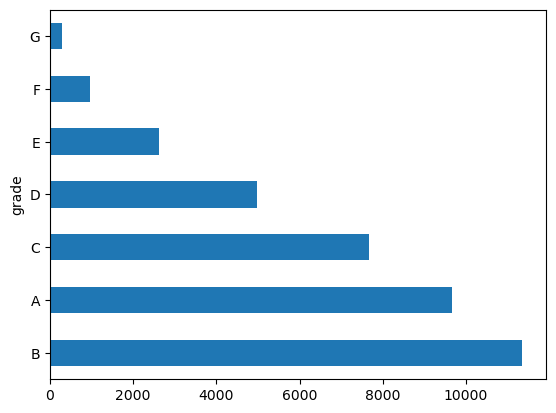

In [248]:
#plot bargraph for grade
loan_df.grade.value_counts().plot.barh()
plt.show()

##### *INFERENCE* : There are A to G grades according to the performances of the people from that the highest people have the grade 'B'.that`s nice.  less defaulter present.

##### 8) Distribution of home ownership

In [249]:
loan_df.home_ownership.describe()

count     37544
unique        5
top        RENT
freq      18078
Name: home_ownership, dtype: object

In [250]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: count, dtype: int64

In [251]:
loan_df.home_ownership.value_counts(normalize=True)

home_ownership
RENT        0.481515
MORTGAGE    0.442015
OWN         0.073780
OTHER       0.002610
NONE        0.000080
Name: proportion, dtype: float64

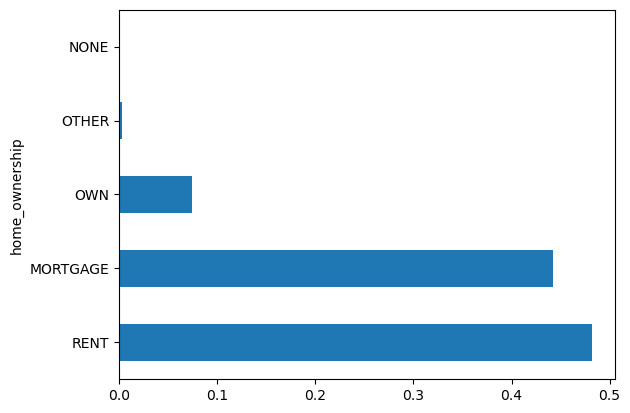

In [252]:
# plot bargraph for home_ownership
loan_df.home_ownership.value_counts(normalize=True).plot.barh()
plt.show()

##### *INFERENCE* : There is almost same amount of the people who live in rent room and mortagage

##### 9) Distribution of verification status

In [253]:
loan_df.verification_status.describe()

count            37544
unique               3
top       Not Verified
freq             16278
Name: verification_status, dtype: object

In [254]:
loan_df.verification_status.value_counts()

verification_status
Not Verified       16278
Verified           11772
Source Verified     9494
Name: count, dtype: int64

In [255]:
loan_df.verification_status.value_counts(normalize=True)

verification_status
Not Verified       0.433571
Verified           0.313552
Source Verified    0.252877
Name: proportion, dtype: float64

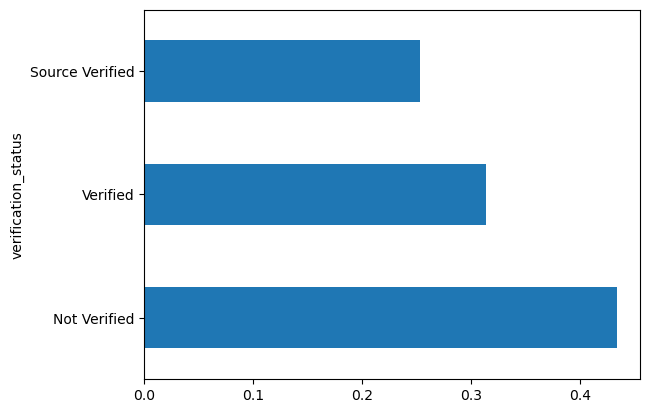

In [256]:
# plot bargraph for verification_status
loan_df.verification_status.value_counts(normalize=True).plot.barh()
plt.show()

##### *INFERENCE* : Not verified borrowers are greater than verified one

### Segmented Univariate Analysis

##### 1) Employment length  

In [257]:
loan_df.emp_length.describe() 

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [258]:
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [259]:
loan_df.emp_length.value_counts(normalize=True)

emp_length
10+ years    0.226081
< 1 year     0.120072
2 years      0.114293
3 years      0.106861
4 years      0.089016
5 years      0.085074
1 year       0.084408
6 years      0.057746
7 years      0.045573
8 years      0.038222
9 years      0.032655
Name: proportion, dtype: float64

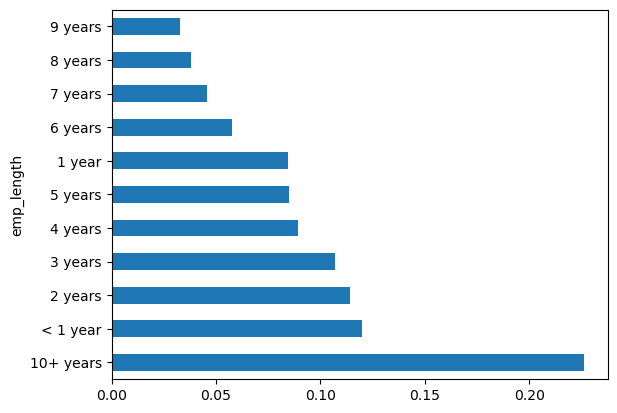

In [260]:
#plot bargrah for emp_length
loan_df.emp_length.value_counts(normalize=True).plot.barh()
plt.show()

##### *INFERENCE* : Majority of borrowsers of work experience greater than 10 years

##### 2) Debt to income ratio

In [261]:
loan_df.dti.describe()

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

In [262]:
loan_df.dti.value_counts()

dti
0.00     168
18.00     44
12.00     44
19.20     39
13.20     38
        ... 
29.78      1
25.73      1
29.48      1
25.60      1
25.43      1
Name: count, Length: 2848, dtype: int64

In [263]:
loan_df.dti.value_counts(normalize=True)

dti
0.00     0.004475
18.00    0.001172
12.00    0.001172
19.20    0.001039
13.20    0.001012
           ...   
29.78    0.000027
25.73    0.000027
29.48    0.000027
25.60    0.000027
25.43    0.000027
Name: proportion, Length: 2848, dtype: float64

##### *INFERENCE* : There's a clear concentration around 0.00, suggesting it's a common or default value.
##### The remaining values have relatively low frequencies, indicating diversity in the 'dti' data.

### Bivariate analysis

##### 1) Correlation across loan_amount , funded_amount

In [264]:
loan_df[['loan_amnt','funded_amnt']].corr()

,loan_amnt,funded_amnt
loan_amnt,1.000000,0.981603
funded_amnt,0.981603,1.000000


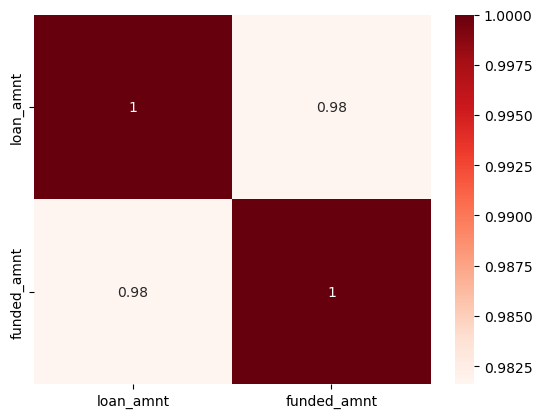

In [265]:
# plot heatmap 
sns.heatmap(loan_df[['loan_amnt','funded_amnt']].corr(), annot=True , cmap='Reds')
plt.show()

##### *INFERENCE* : Strong positive correlation: The correlation coefficient between loan_amnt and funded_amnt is 0.98, indicating a very strong positive correlation. 
##### This means that as the loan amount increases, the funded amount also tends to increase.

##### 2) funded_amount vs funded_amount_inv

In [266]:
loan_df[['funded_amnt','funded_amnt_inv']].corr()

,funded_amnt,funded_amnt_inv
funded_amnt,1.0000,0.9553
funded_amnt_inv,0.9553,1.0000


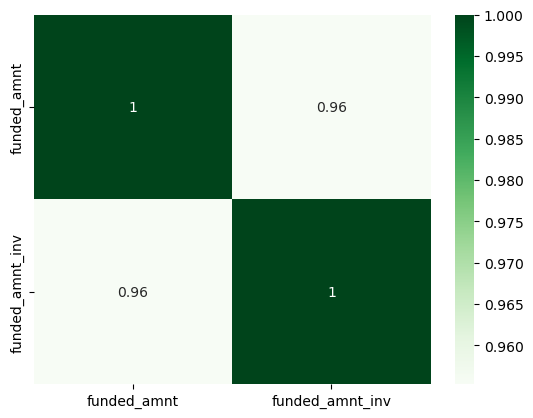

In [267]:
#plot heatmap
sns.heatmap(loan_df[['funded_amnt','funded_amnt_inv']].corr(),annot=True, cmap='Greens')
plt.show()

##### *INFERENCE* : Strong Positive Correlation: The correlation coefficient between funded_amnt and funded_amnt_inv is 0.96, indicating a very strong positive correlation.
##### This suggests a close relationship between these two variables.

##### 3) loan_amnt vs annual_inc

In [268]:
loan_df[['loan_amnt', 'annual_inc']].corr()

,loan_amnt,annual_inc
loan_amnt,1.000000,0.266282
annual_inc,0.266282,1.000000


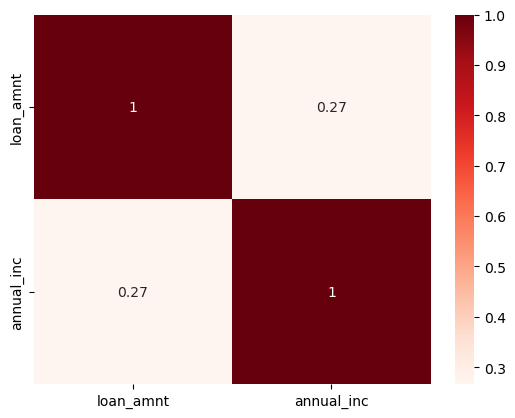

In [269]:
#plot heatmap
sns.heatmap(loan_df[['loan_amnt', 'annual_inc']].corr(), annot=True, cmap='Reds')
plt.show()

##### *INFERENCE* : The correlation coefficient between loan_amnt and annual_inc is 0.27, indicating a weak positive correlation. 
##### This means that there's a slight tendency for individuals with higher annual incomes to also have larger loan amounts.

##### 4) loan_amnt vs dti

In [270]:
loan_df[['loan_amnt', 'dti']].corr()

,loan_amnt,dti
loan_amnt,1.000000,0.061402
dti,0.061402,1.000000


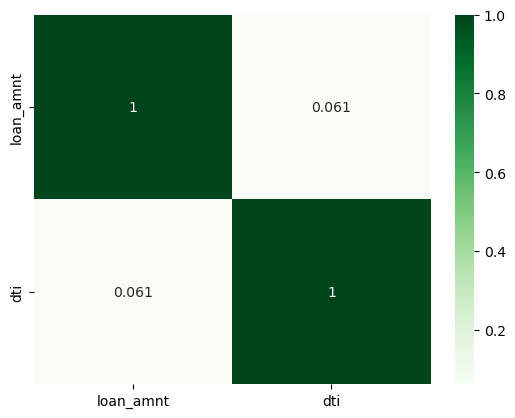

In [271]:
#plot heatmap
sns.heatmap(loan_df[['loan_amnt', 'dti']].corr(), annot=True, cmap='Greens')
plt.show()


##### *INFERENCE* : There's a weak positive correlation (0.061) between the loan amount ('loan_amnt') and the debt-to-income ratio ('dti') in this dataset.
##### This suggests that there's a slight tendency for higher loan amounts to be associated with higher debt-to-income ratios, but the relationship is not very strong.

##### 5) funded_amnt vs dti

In [272]:
loan_df[['funded_amnt', 'dti']].corr()

,funded_amnt,dti
funded_amnt,1.000000,0.061251
dti,0.061251,1.000000


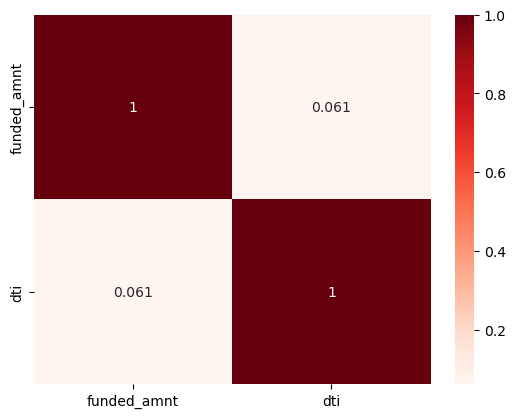

In [273]:
#plot heatmap
sns.heatmap(loan_df[['funded_amnt', 'dti']].corr(), annot=True, cmap='Reds')
plt.show()

##### *INFERENCE* : The weak positive correlation of 0.061 suggests a slight tendency for higher funded amounts to be associated with higher debt-to-income ratios. 
##### However, this relationship is not very strong.

##### 6) funded_amnt vs annual_inc

In [274]:
loan_df[['funded_amnt', 'annual_inc']].corr()

,funded_amnt,annual_inc
funded_amnt,1.000000,0.261959
annual_inc,0.261959,1.000000


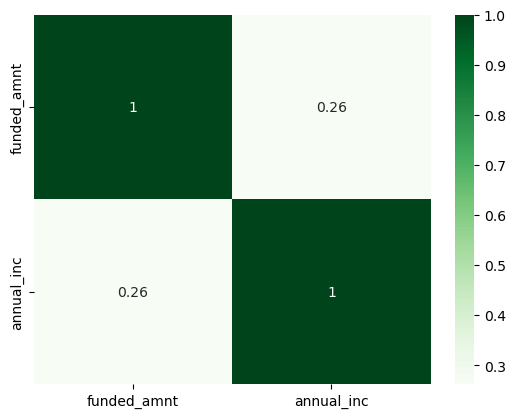

In [275]:
sns.heatmap(loan_df[['funded_amnt', 'annual_inc']].corr(), annot=True, cmap='Greens')
plt.show()

##### *INFERENCE* : The correlation coefficient between 'funded_amnt' and 'annual_inc' is 0.26, indicating a weak positive relationship. 
##### This means that as 'annual_inc' increases, 'funded_amnt' tends to increase slightly, but the relationship is not very strong.


##### 7) funded_amnt_inv vs installment

In [276]:
loan_df[['funded_amnt', 'installment']].corr()

,funded_amnt,installment
funded_amnt,1.000000,0.957721
installment,0.957721,1.000000


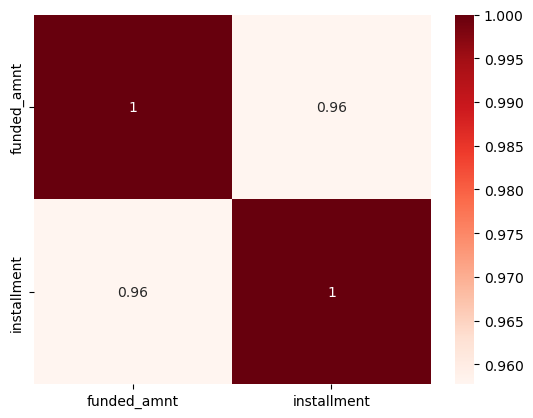

In [277]:
#plot heatmap
sns.heatmap(loan_df[['funded_amnt', 'installment']].corr(), annot=True, cmap='Reds')
plt.show()

###### *INFERENCE* : There's a very strong positive correlation (0.96) between 'funded_amnt' and 'installment'. 
##### This suggests that higher funded amounts tend to be associated with higher installment values, and vice versa.

##### 8)  loan status vs annual_inc

In [278]:
loan_df.groupby('loan_status')['annual_inc'].mean()

loan_status
Charged Off    63331.105710
Fully Paid     70427.586885
Name: annual_inc, dtype: float64

In [279]:
loan_df.groupby('loan_status')['annual_inc'].median()

loan_status
Charged Off    54000.0
Fully Paid     60000.0
Name: annual_inc, dtype: float64

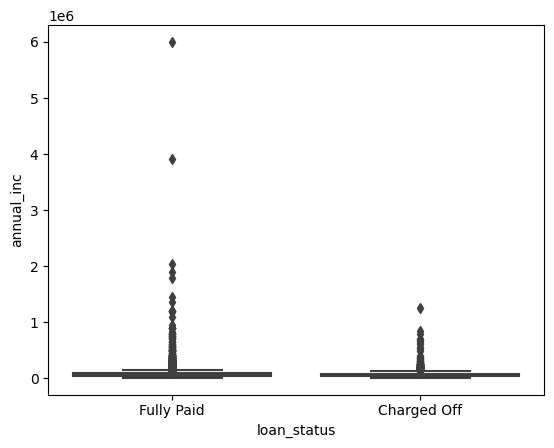

In [280]:
#plot boxplot
sns.boxplot(data=loan_df, x='loan_status', y='annual_inc')
plt.show()

##### *INFERENCE* :  Borrowers who charged off their loans tend to have lower median annual incomes than those who fully paid. 
##### This suggests a potential relationship between income level and loan repayment behavior.

##### 9)  dti vs loan_status

In [281]:
loan_df.groupby('loan_status')['dti'].mean()

loan_status
Charged Off    13.979809
Fully Paid     13.167351
Name: dti, dtype: float64

In [282]:
loan_df.groupby('loan_status')['dti'].median()

loan_status
Charged Off    14.29
Fully Paid     13.21
Name: dti, dtype: float64

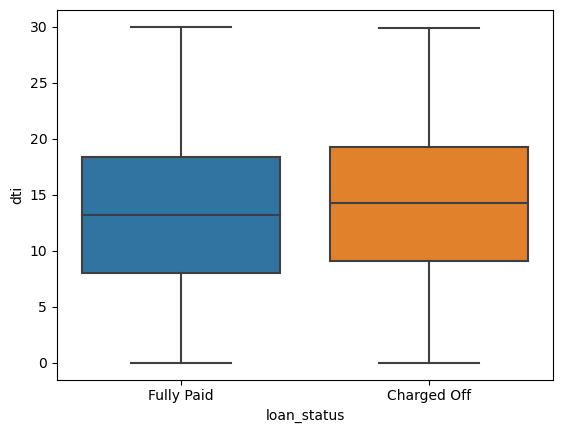

In [283]:
#plot boxplot
sns.boxplot(data=loan_df, x='loan_status', y='dti')
plt.show()

##### *INFERENCE* : 'dti' and 'loan status' almost have the same median

##### 10)  loan_status vs loan_amnt

In [284]:
loan_df.groupby('loan_status')['loan_amnt'].mean()

loan_status
Charged Off    12244.077607
Fully Paid     10930.419972
Name: loan_amnt, dtype: float64

In [285]:
loan_df.groupby('loan_status')['loan_amnt'].median()

loan_status
Charged Off    10000.0
Fully Paid      9600.0
Name: loan_amnt, dtype: float64

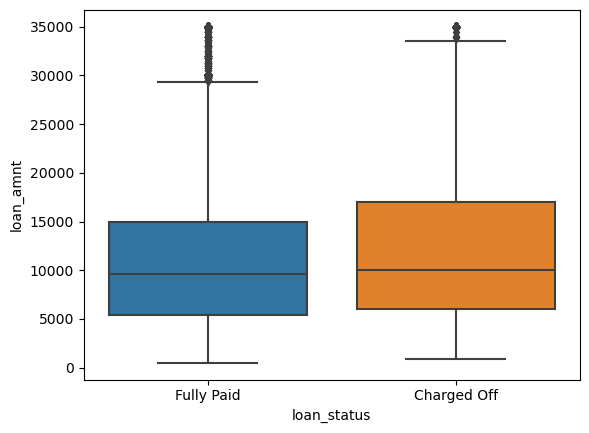

In [286]:
#plot boxplot
sns.boxplot(data=loan_df, x='loan_status', y='loan_amnt')
plt.show()

##### *INFERENCE* :  There's a relationship between loan status and loan amount, with higher loan amounts being more likely to be fully paid.

##### Fully Paid loans have a wider range of loan amounts compared to Charged Off loans.

### Multivariate analysis

##### 1) loan status vs purposes vs loan_amnt

In [287]:
status = pd.pivot_table(data=loan_df, index='purpose', columns='loan_status', values='loan_amnt')
status

loan_status,Charged Off,Fully Paid
purpose,,
car,7291.129032,6737.761021
credit_card,13185.196078,11447.271588
debt_consolidation,13617.105263,12375.906909
educational,7963.461538,6627.547170
home_improvement,12102.196970,11284.124236
house,12640.254237,12881.101695
major_purchase,9347.748815,7959.470305
medical,8780.693069,8023.873874
moving,6139.880952,6706.196581


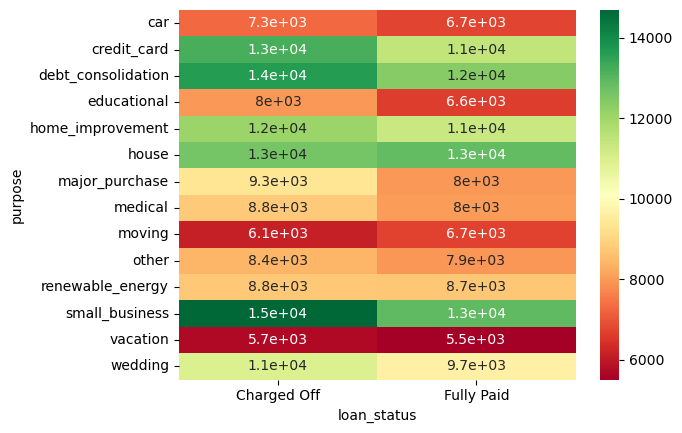

In [288]:
sns.heatmap(status, annot=True, cmap='RdYlGn')
plt.show()

##### *INFERENCE* :
1)Highest average loan amounts:
Charged Off: Small business loans (14,686)
Fully Paid: House loans (12,881)

2)Lowest average loan amounts:
Charged Off: Vacation loans (5,707)
Fully Paid: Vacation loans (5,510)

3)Purposes with noticeably higher charged-off amounts than paid amounts:
Small business loans (difference of 1,776)
Credit card loans (difference of 1,738)
Major purchase loans (difference of 1,388)

4)Purposes with relatively similar charged-off and paid amounts:
Renewable energy loans (difference of 178)
Moving loans (charged-off amounts are even slightly lower)

##### 2) loan status vs term vs loan amount

In [289]:
status = pd.pivot_table(data=loan_df, index='term', columns='loan_status', values='loan_amnt')
status

loan_status,Charged Off,Fully Paid
term,,
36 months,9527.237227,9682.42643
60 months,15833.437231,15470.44438


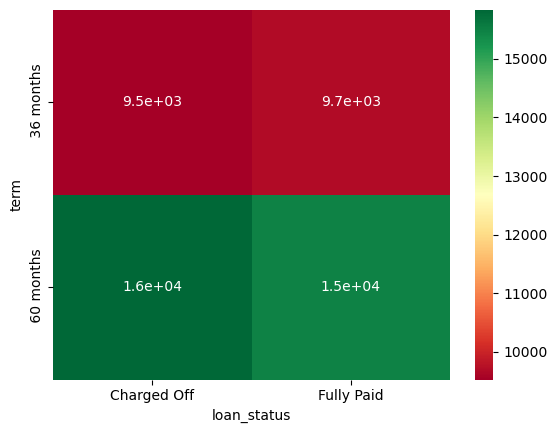

In [290]:
sns.heatmap(status, annot=True, cmap='RdYlGn')
plt.show()

##### *INFERENCE* : There is almost same amount of laan charged off and full paid borrwers in 36 months and 60 months

##### 3) loan status vs loan_amnt vs verification status

In [291]:
status = pd.pivot_table(data=loan_df, index='verification_status', columns='loan_status', values='loan_amnt')
status

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,8786.566618,8397.584159
Source Verified,10744.376791,9879.673994
Verified,16941.120778,15467.867692


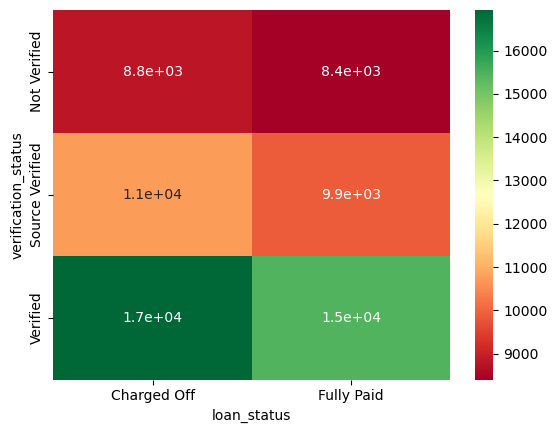

In [292]:
sns.heatmap(status, annot=True, cmap='RdYlGn')
plt.show()

##### *INFERENCE* : no such big difference occur in that but borrowers which charged off mostly are verified and have the loan amount greater than 16000

##### 4)  loan status vs loan_amnt vs home ownership

In [293]:
status = pd.pivot_table(data=loan_df, index='home_ownership', columns='loan_status', values='loan_amnt')
status

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,14220.868597,12268.055749
NONE,NaN,5600.000000
OTHER,13747.222222,9969.062500
OWN,11401.500000,10116.645570
RENT,10735.334430,9811.039956


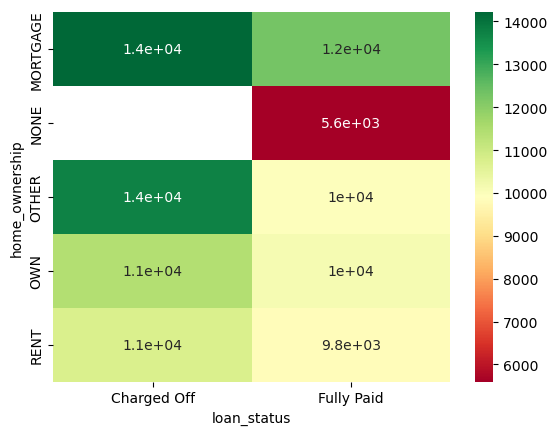

In [294]:
sns.heatmap(status, annot=True, cmap='RdYlGn')
plt.show()

##### *INFERENCE* : Borrowers which charged off mostly are from mortagage and other

##### 5) loan status vs loan amount vs grade

In [295]:
status = pd.pivot_table(data=loan_df, index='grade', columns='loan_status', values='loan_amnt')
status

loan_status,Charged Off,Fully Paid
grade,,
A,7985.752688,8727.224786
B,11061.549815,11004.708117
C,11183.326863,10817.031030
D,12257.557604,12158.577298
E,15835.107143,15600.039062
F,19215.175719,17535.874613
G,18588.250000,21125.378788


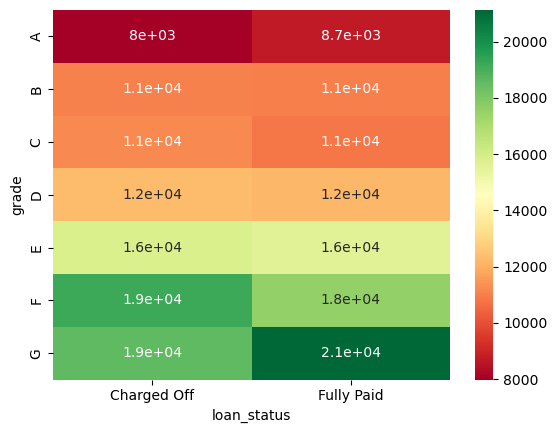

In [296]:
sns.heatmap(status, annot=True, cmap='RdYlGn')
plt.show()

##### *INFERENCE* : 
##### Higher loan amounts are generally associated with higher risk grades (E, F, G) and charged-off statuses.
##### Loan amounts tend to be more similar between fully paid and charged-off loans for lower risk grades (A, B, C).
##### The distribution of loan amounts for fully paid loans is relatively consistent across grades.
##### Charged-off loans show more variability in loan amounts, especially for higher risk grades.

##### 8) loan_amnt vs loan status vs dti

In [297]:
status = pd.pivot_table(data=loan_df, index='emp_length', columns='loan_status', values='loan_amnt')
status

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,10663.322368,9954.883892
10+ years,14594.459053,12475.887243
2 years,10738.095238,10031.142589
3 years,11405.495495,10513.328030
4 years,11522.402597,10729.756944
5 years,12044.432314,10958.342471
6 years,12563.599349,11176.007523
7 years,12894.961977,11323.566989
8 years,13050.862069,11525.811688


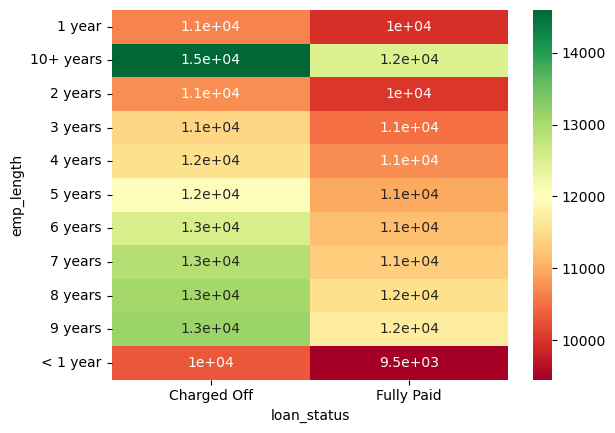

In [298]:
sns.heatmap(status, annot=True, cmap='RdYlGn')
plt.show()

##### *INFERENCE* : Charged Off Loans Concentrated in Shorter Employment Lengths: The highest loan amounts for "Charged Off" loans are concentrated in the first few years of employment ("1 year," "2 years," and "4 years"). This suggests a potential correlation between shorter employment lengths and higher risk of loan defaults.
##### Fully Paid Loans More Evenly Distributed: The loan amounts for "Fully Paid" loans are more evenly distributed across different employment lengths, with no clear pattern of higher or lower amounts in specific ranges.

# *CONCLUSION*

## UNIVARIATE ANALYSIS

##### 1) Charged off less in number than the fully paid borrwers.

#### 2) Max amount of loan is from 5000 - 15000

#### 3) Most borrwers took the loan of 10000 rupees 

#### 4) Mostly the loan taken by interest rate is 10.99% (mode)  

#### 5) 38% of the people out of 100% is of the payment 60000 and this is the highest percentage

#### 6) Almost 75%(28287) of the borrowers take loan of 36 month

#### 7) There are so many reasons for take a loan from that highest purposes of taking loan is debt_consolidation and i.e 47%

#### 8) There are A to G grades according to the performances of the people from that the highest people have the grade 'B'.that`s nice. less defaulter present.

#### 9) There is almost same amount of the people who live in rent room and mortagage

#### 10) Not verified borrowers are greater than verified one

## SEGMENTED UNIVRIATE ANALYSIS

#### 1) Majority of borrowsers of work experience greater than 10 years 

#### 2) There's a clear concentration around 0.00, suggesting it's a common or default value.
#### The remaining values have relatively low frequencies, indicating diversity in the 'dti' data.

## BIVARIATE ANALYSIS

#### 1)  Strong positive correlation: The correlation coefficient between loan_amnt and funded_amnt is 0.98, indicating a very strong positive correlation.
#### This means that as the loan amount increases, the funded amount also tends to increase.

#### 2) Strong Positive Correlation: The correlation coefficient between funded_amnt and funded_amnt_inv is 0.96, indicating a very strong positive correlation.
#### This suggests a close relationship between these two variables.

#### 3)  The correlation coefficient between loan_amnt and annual_inc is 0.27, indicating a weak positive correlation.
#### This means that there's a slight tendency for individuals with higher annual incomes to also have larger loan amounts.

#### 4)There's a weak positive correlation (0.061) between the loan amount ('loan_amnt') and the debt-to-income ratio ('dti') in this dataset.
#### This suggests that there's a slight tendency for higher loan amounts to be associated with higher debt-to-income ratios, but the relationship is not very strong.¶ 

#### 5) The weak positive correlation of 0.061 suggests a slight tendency for higher funded amounts to be associated with higher debt-to-income ratios.
#### However, this relationship is not very strong. 

#### 6) The correlation coefficient between 'funded_amnt' and 'annual_inc' is 0.26, indicating a weak positive relationship.
#### This means that as 'annual_inc' increases, 'funded_amnt' tends to increase slightly, but the relationship is not very strong.

#### 7) There's a very strong positive correlation (0.96) between 'funded_amnt' and 'installment'.
#### This suggests that higher funded amounts tend to be associated with higher installment values, and vice versa.

#### 8) Borrowers who charged off their loans tend to have lower median annual incomes than those who fully paid.
#### This suggests a potential relationship between income level and loan repayment behavior.

#### 9) 'dti' and 'loan status' almost have the same median

#### 10) There's a relationship between loan status and loan amount, with higher loan amounts being more likely to be fully paid.
#### Fully Paid loans have a wider range of loan amounts compared to Charged Off loans

## MULTIVARIATE ANALYSIS

#### [1]
#### 1)Highest average loan amounts: Charged Off: Small business loans (14,686) Fully Paid: House loans (12,881)

#### 2)Lowest average loan amounts: Charged Off: Vacation loans (5,707) Fully Paid: Vacation loans (5,510)

#### 3)Purposes with noticeably higher charged-off amounts than paid amounts: Small business loans (difference of 1,776) Credit card loans (difference of 1,738) Major purchase loans (difference of 1,388)

#### 4)Purposes with relatively similar charged-off and paid amounts: Renewable energy loans (difference of 178) Moving loans (charged-off amounts are even slightly lower)

#### [2] There is almost same amount of laan charged off and full paid borrwers in 36 months and 60 months

#### [3] no such big difference occur in that but borrowers which charged off mostly are verified and have the loan amount greater than 16000

#### [4] Borrowers which charged off mostly are from mortagage and other

#### [5]  
#### Higher loan amounts are generally associated with higher risk grades (E, F, G) and charged-off statuses.
#### Loan amounts tend to be more similar between fully paid and charged-off loans for lower risk grades (A, B, C).
#### The distribution of loan amounts for fully paid loans is relatively consistent across grades.¶
#### Charged-off loans show more variability in loan amounts, especially for higher risk grades.

#### [6]   Charged Off Loans Concentrated in Shorter Employment Lengths: The highest loan amounts for "Charged Off" loans are concentrated in the first few years of employment ("1 year," "2 years," and "4 years"). This suggests a potential correlation between shorter employment lengths and higher risk of loan defaults.
#### Fully Paid Loans More Evenly Distributed: The loan amounts for "Fully Paid" loans are more evenly distributed across different employment lengths, with no clear pattern of higher or lower amounts in specific ranges

## RECOMMENDATION

### Recommendations to Identify Risk Factors for Loan Defaulters:
Based on the provided univariate, segmented univariate, bivariate, and multivariate analyses, here are some recommendations to identify risk factors for loan defaulters:

#### 1. Focus on borrowers with:

##### Higher loan amounts: 
The analysis shows a positive correlation between loan amount and default. Loans exceeding ₹16,000, especially for charged-off loans, might be risky.
##### Lower income levels: 
Charged-off borrowers tend to have lower median annual income compared to fully paid ones. Analyze income levels in relation to loan amounts to identify potential risks.
##### Shorter employment lengths: 
Charged-off loans are concentrated in borrowers with shorter employment histories (1-4 years). Consider employment stability as a risk factor.
##### Higher debt-to-income ratios (dti): 
While the correlation is weak, a higher dti might indicate higher financial burden and potential for default. Monitor dti in conjunction with other factors.
##### Risk grade E, F, or G: 
These grades are associated with higher loan amounts and charged-off statuses. Analyze loan grade distribution for borrowers with higher risk profiles.